In [1]:
from wordcloud import WordCloud, STOPWORDS

import os
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import itertools
import collections

import tweepy as tw
import nltk
from nltk.corpus import stopwords
from nltk import bigrams
import re
import networkx as nx
from textblob import TextBlob, Word, Blobber

import warnings
warnings.filterwarnings("ignore")


# For more info on how TextBlob works see:  https://github.com/sloria/TextBlob



sns.set(font_scale=1.5)
sns.set_style("whitegrid")

nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/800017409/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [2]:
consumer_key= 'XgLfVqV7ADXpG5EHnMgyx3xwo'
consumer_secret= '870pskWxaItAxxqdeHK5bbLcfvAv41mSDKgzl9t0YH47ImCHKS'
access_token= '56790330-wAee8FiCqQp6AIlaXDrZHfJVa5IDmMwmlPmU2fOqG'
access_token_secret= 'lCfFwqHmMCxREpuicnyC2Hs6o4OlVUi0hnzle5Xk24r8n'

In [3]:
auth = tw.OAuthHandler(consumer_key, consumer_secret)
auth.set_access_token(access_token, access_token_secret)
api = tw.API(auth, wait_on_rate_limit=True)

In [4]:
# The Twitter API only allows you to access the past few weeks of tweets unless you purchase the premium API


search_term = "#federalreserve -filter:retweets"
date_since = "2019-11-30"

tweets = tw.Cursor(api.search,
                   q=search_term,
                   lang="en",
                   since=date_since).items(500)

all_tweets = [tweet.text for tweet in tweets]

all_tweets[:50]

['Card Late Payers Continue to Rise Despite Job Glut https://t.co/85iUb1Sxzh #delinquency #Q3 #federalreserve… https://t.co/Hd6oNAzWNs',
 'Which monetary policy has been more expansionary in the past 36 months? A look at the growth in the money supply sh… https://t.co/nD9vCjIrVT',
 '5000 years history of Global Interest Rates \u2066@IanRobinson\u2069 #FederalReserve \u2066@RBAInfo\u2069 #interestrates  https://t.co/6hqxAsGKmZ',
 'Federal Reserve Considers Creating a Separate Entity for Cash Injections - https://t.co/kJeBIfetQV #Banking #Banks… https://t.co/d2I4hU91fz',
 'Watch Net Lease TV - https://t.co/ppsWDkk4dF\n\n#monetarypolicy #markets #bonds #investor #privateequity #options… https://t.co/W94CEYp4Ca',
 'Brainard shares Fed’s thinking on CRA rule reform, reiterates push for single set of standards #FederalReserve https://t.co/S830ZnbPCZ',
 "Nov consumer credit: Ancient history, but Fed's rpt just now shows overall increase at 3.6% annual rate, not the un… https://t.co/kp3kZvrkU0

In [28]:
def remove_url(txt):
    return " ".join(re.sub("([^0-9A-Za-z \t])|(\w+:\/\/\S+)", "", txt).split())
all_tweets_no_urls = [remove_url(tweet) for tweet in all_tweets]

In [29]:
# Create a list of lists containing lowercase words for each tweet
words_in_tweet = [tweet.lower().split() for tweet in all_tweets_no_urls]
words_in_tweet[:2]

[['card',
  'late',
  'payers',
  'continue',
  'to',
  'rise',
  'despite',
  'job',
  'glut',
  'delinquency',
  'q3',
  'federalreserve'],
 ['which',
  'monetary',
  'policy',
  'has',
  'been',
  'more',
  'expansionary',
  'in',
  'the',
  'past',
  '36',
  'months',
  'a',
  'look',
  'at',
  'the',
  'growth',
  'in',
  'the',
  'money',
  'supply',
  'sh']]

In [7]:
# List of all words across tweets
all_words_no_urls = list(itertools.chain(*words_in_tweet))

# Create counter
counts_no_urls = collections.Counter(all_words_no_urls)

clean_tweets_no_urls = pd.DataFrame(counts_no_urls.most_common(15),
                             columns=['words', 'count'])

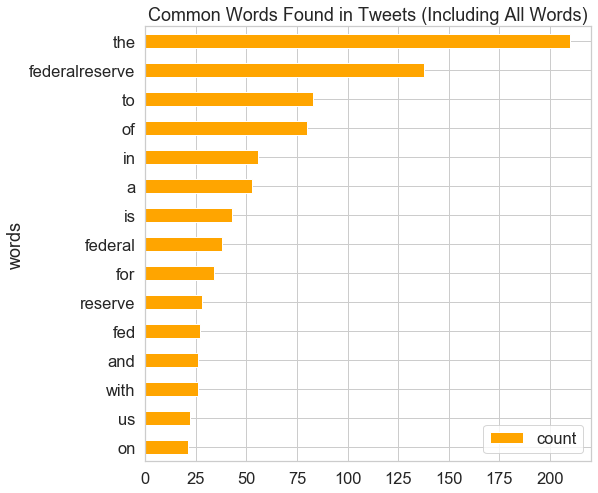

In [10]:
fig, ax = plt.subplots(figsize=(8, 8))

# Plot horizontal bar graph
clean_tweets_no_urls.sort_values(by='count').plot.barh(x='words',
                      y='count',
                      ax=ax,
                      color="orange")

ax.set_title("Common Words Found in Tweets (Including All Words)")

plt.show()


In [12]:
stop_words = set(stopwords.words('english'))

In [15]:
# Remove stop words from each tweet list of words
tweets_nsw = [[word for word in tweet_words if not word in stop_words]
              for tweet_words in words_in_tweet]
tweets_nsw

[['card',
  'late',
  'payers',
  'continue',
  'rise',
  'despite',
  'job',
  'glut',
  'delinquency',
  'q3',
  'federalreserve'],
 ['monetary',
  'policy',
  'expansionary',
  'past',
  '36',
  'months',
  'look',
  'growth',
  'money',
  'supply',
  'sh'],
 ['5000',
  'years',
  'history',
  'global',
  'interest',
  'rates',
  'ianrobinson',
  'federalreserve',
  'rbainfo',
  'interestrates'],
 ['federal',
  'reserve',
  'considers',
  'creating',
  'separate',
  'entity',
  'cash',
  'injections',
  'banking',
  'banks'],
 ['watch',
  'net',
  'lease',
  'tv',
  'monetarypolicy',
  'markets',
  'bonds',
  'investor',
  'privateequity',
  'options'],
 ['brainard',
  'shares',
  'feds',
  'thinking',
  'cra',
  'rule',
  'reform',
  'reiterates',
  'push',
  'single',
  'set',
  'standards',
  'federalreserve'],
 ['nov',
  'consumer',
  'credit',
  'ancient',
  'history',
  'feds',
  'rpt',
  'shows',
  'overall',
  'increase',
  '36',
  'annual',
  'rate',
  'un'],
 ['credit',
  

In [14]:
# Create a counter to return the most commonly used words and the number of times that they are used.
all_words_nsw = list(itertools.chain(*tweets_nsw))
counts_nsw = collections.Counter(all_words_nsw)
counts_nsw.most_common(15)

[('federalreserve', 138),
 ('federal', 38),
 ('reserve', 28),
 ('fed', 27),
 ('us', 22),
 ('money', 18),
 ('economy', 17),
 ('amp', 16),
 ('lost', 15),
 ('decadethelostdecade', 15),
 ('pujamehra', 15),
 ('centreforpolicyresearchcdsbath', 15),
 ('lehmanbrothers', 15),
 ('merrilllynch', 15),
 ('history', 13)]

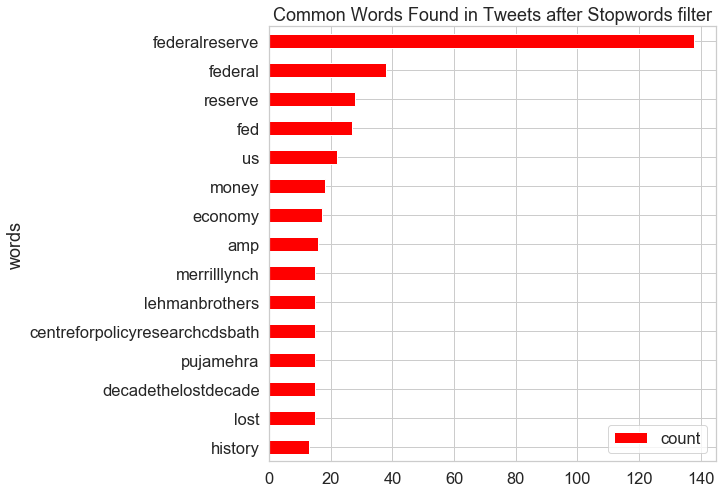

In [17]:
clean_tweets_nsw = pd.DataFrame(counts_nsw.most_common(15),
                             columns=['words', 'count'])

fig, ax = plt.subplots(figsize=(8, 8))

# Plot horizontal bar graph
clean_tweets_nsw.sort_values(by='count').plot.barh(x='words',
                      y='count',
                      ax=ax,
                      color="red")

ax.set_title("Common Words Found in Tweets after Stopwords filter")

plt.show()

In [18]:
# Remove collection words. Collection words are the words that you used to query your data from Twitter. 
# This This could skew your word frequency analysis.

collection_words = ['#federalreserve', 'federalreserve', 'fed','reserve', 'federal','us']
tweets_nsw_nc = [[w for w in word if not w in collection_words]
                 for word in tweets_nsw]

# Flatten list of words in clean tweets
all_words_nsw_nc = list(itertools.chain(*tweets_nsw_nc))

# Create counter of words in clean tweets
counts_nsw_nc = collections.Counter(all_words_nsw_nc)

counts_nsw_nc.most_common(15)


[('money', 18),
 ('economy', 17),
 ('amp', 16),
 ('lost', 15),
 ('decadethelostdecade', 15),
 ('pujamehra', 15),
 ('centreforpolicyresearchcdsbath', 15),
 ('lehmanbrothers', 15),
 ('merrilllynch', 15),
 ('history', 13),
 ('feds', 12),
 ('rate', 12),
 ('markets', 11),
 ('heres', 11),
 ('bitcoin', 11)]

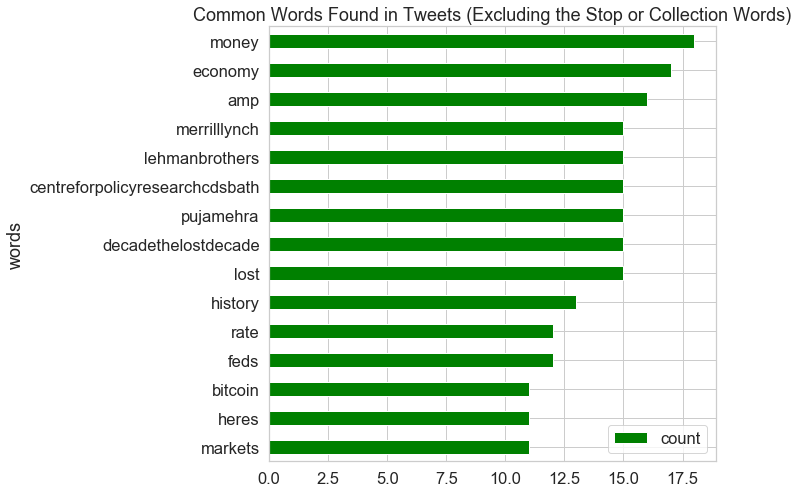

In [21]:
clean_tweets_ncw = pd.DataFrame(counts_nsw_nc.most_common(15),
                             columns=['words', 'count'])

fig, ax = plt.subplots(figsize=(8, 8))

# Plot horizontal bar graph
clean_tweets_ncw.sort_values(by='count').plot.barh(x='words',
                      y='count',
                      ax=ax,
                      color="green")

ax.set_title("Common Words Found in Tweets (Excluding the Stop or Collection Words)")

plt.show()

In [22]:

# Create list of lists containing bigrams in tweets
terms_bigram = [list(bigrams(tweet)) for tweet in tweets_nsw_nc]

# Flatten list of bigrams in clean tweets
bigrams = list(itertools.chain(*terms_bigram))

# Create counter of words in clean bigrams
bigram_counts = collections.Counter(bigrams)

bigram_counts.most_common(20)

[(('lost', 'decadethelostdecade'), 15),
 (('decadethelostdecade', 'pujamehra'), 15),
 (('pujamehra', 'centreforpolicyresearchcdsbath'), 15),
 (('centreforpolicyresearchcdsbath', 'lehmanbrothers'), 15),
 (('lehmanbrothers', 'merrilllynch'), 15),
 (('video', 'familiar'), 9),
 (('familiar', 'heres'), 9),
 (('heres', 'quick'), 9),
 (('quick', 'history'), 9),
 (('history', 'fedpolicy'), 9),
 (('secrets', 'temple'), 8),
 (('temple', 'works'), 8),
 (('bond', 'report'), 6),
 (('monetary', 'policy'), 5),
 (('interest', 'rate'), 5),
 (('treasury', 'yields'), 5),
 (('messiah', 'louisfarrakhan'), 5),
 (('louisfarrakhan', 'warns'), 5),
 (('chi', 'feds'), 5),
 (('report', 'treasury'), 4)]

In [23]:
bigram_df = pd.DataFrame(bigram_counts.most_common(20),
                             columns=['bigram', 'count'])

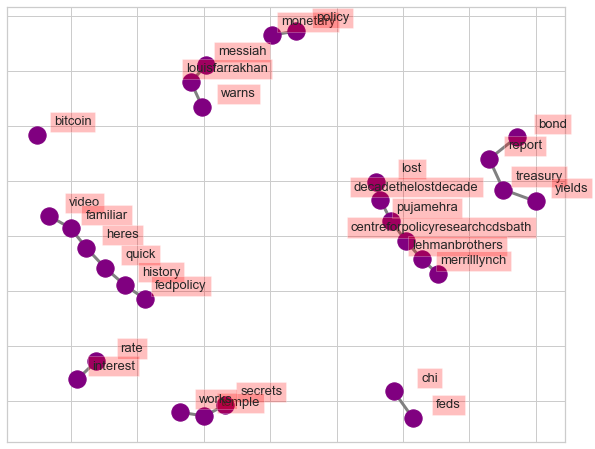

In [24]:
# Create dictionary of bigrams and their counts
d = bigram_df.set_index('bigram').T.to_dict('records')
# Create network plot 
G = nx.Graph()

# Create connections between nodes
for k, v in d[0].items():
    G.add_edge(k[0], k[1], weight=(v * 10))

G.add_node("bitcoin", weight=100)
fig, ax = plt.subplots(figsize=(10, 8))

pos = nx.spring_layout(G, k=1)

# Plot networks
nx.draw_networkx(G, pos,
                 font_size=16,
                 width=3,
                 edge_color='grey',
                 node_color='purple',
                 with_labels = False,
                 ax=ax)

# Create offset labels
for key, value in pos.items():
    x, y = value[0]+.135, value[1]+.045
    ax.text(x, y,
            s=key,
            bbox=dict(facecolor='red', alpha=0.25),
            horizontalalignment='center', fontsize=13)
    
plt.show()

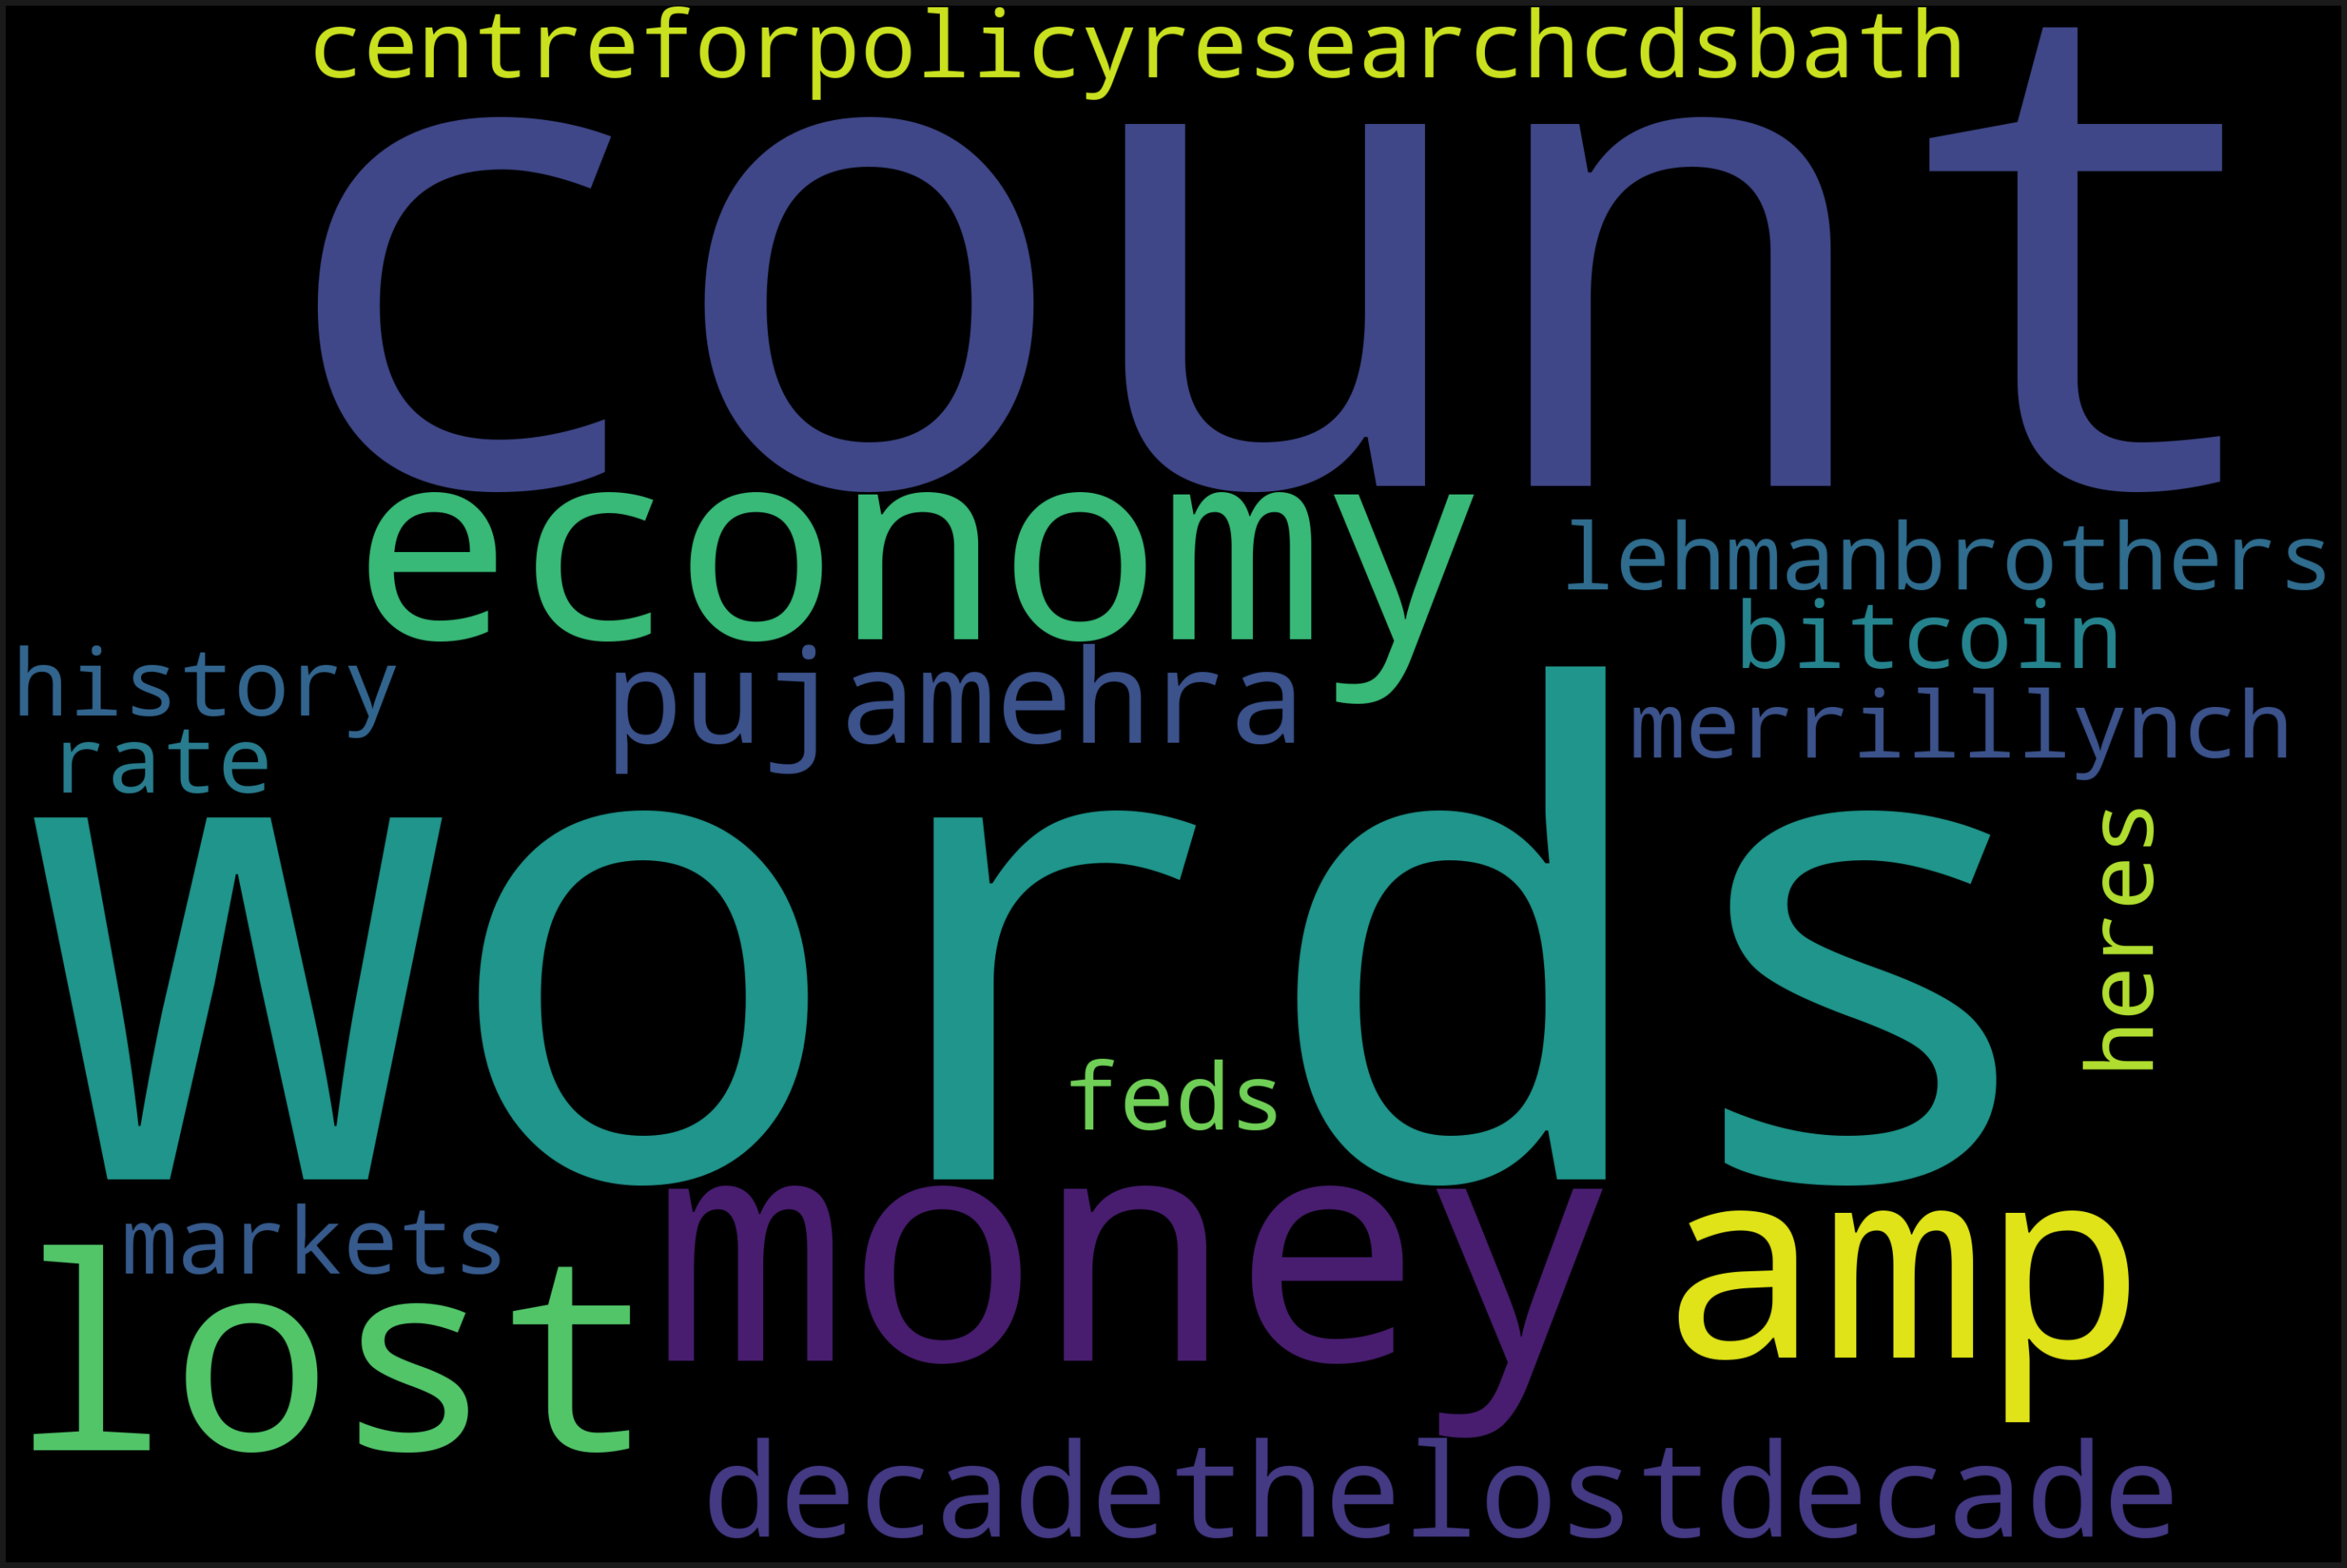

In [25]:

text = clean_tweets_ncw
wordcloud = WordCloud(
    width = 3000,
    height = 2000,
    background_color = 'black',
    stopwords = STOPWORDS).generate(str(text))
fig = plt.figure(
    figsize = (40, 30),
    facecolor = 'k',
    edgecolor = 'k')
plt.imshow(wordcloud, interpolation = 'bilinear')
plt.axis('off')
plt.tight_layout(pad=0)
plt.show()